# Intro to Python Plotting

Python is one of the top coding languages for analyzing and plotting scientific data, both in the HPC world and in general. This notebook contains a set of examples to get you started with common Python packages used for basic plotting.

The goal here is to get you away from making graphs in Excel. Not to say that Excel is bad, but once your data starts growing or starts to get complex, then you are quickly leaving the scope of plotting things with Excel. Also, in the world of HPC, most things are giant text files or other data formats (e.g., HDF5) not meant to be read by Excel.

The other goal is to get you familiar with the structure and workflow of a Python figure/plot in general. The goal is not necessarily to show you all the features of a given plot or library, but to get you started so that you can explore more parameters on your own. For example, I won't show you examples of literally every matplotlib linestyle option, but I *WILL* show you how to tell Python to use a specific linestyle in general (and then I will provide documentation that lists the rest of the options). That is the methodology that we're going for here.

Packages that will be used are:

* [Matplotlib](https://matplotlib.org/stable/users/index.html) (The most common general-purpose plotting library. Specifically we will be using the "pyplot" subpackage of Matplotlib which provides useful plotting functions. "Matplotlib" and "pyplot" will be used interchangeably in this notebook.)
* [Seaborn](https://seaborn.pydata.org/) (Typically used for generating statistical graphs -- uses matplotlib behind the scenes.)
* [Pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide) (Used for processing and plotting data. Uses "dataframes" that are specialized to handle **tabulated** data. Has plotting capability natively.)
* [NumPy](https://numpy.org/doc/stable/) (Used for processing data. Uses general n-dimensional "arrays". Does not have native plotting functions like Pandas, so it is usually paired with matplotlib.)

Although not a plotting library, the NumPy package will help us handle data. One of the main convenient parts of NumPy is that it lets us use arrays instead of just lists. Arrays are much more versatile, and typically much more user friendly when you need to plot data. It is pretty much the "standard" Python package used for data science. For this set of examples, we won't cover NumPy in depth but rather show its compatibility with Matplotlib.

Pandas is similar to NumPy in a sense, but is more designed to handle 2D tabulated data like CSV files or spreadsheet-type data. Pandas loads data into "dataframes" (comparable to NumPy "arrays"), which can then be natively plotted using Pandas (however, it uses matplotlib behind the scenes).

**Table of Contents**

* [1. Matplotlib Basics](#mpl-basics)
    * [1.1 Making a simple plot](#mpl-simple)
        * [1.1.1 Changing Markers, Line Styles, and Colors](#mpl-markers)
        * [1.1.2 Adding Axis Labels, and Legend](#mpl-annotations)
        * [1.1.3 Convert to "Axes" API](#mpl-axes)
        * [1.1.4 Adding More Data](#mpl-add)
        * [1.1.5 Changing Limits and Spacing](#mpl-limits)
        * [1.1.6 Making Subplots](#mpl-subplots)
    * [1.2 Bar charts](#mpl-bars)
        * [1.2.1 Grouped Bar Charts](#mpl-group-bars)
    * [1.3 Histograms](#mpl-hists)
        * [1.3.1 2D Histograms](#mpl-2dhists)
    * [1.4 3D Plots](#mpl-3d)
    * [1.5 Pseudocolor Plots](#mpl-pseudo)
* [2. Pandas](#pandas)
    * [2.1 Plotting a Pandas DataFrame](#pandas-plot)
        * [2.1.1 Comparison to Matplotlib](#pandas-compare) 
    * [2.2 Reading and Plotting CSV DataFrames](#pandas-csv)
    * [2.3 Plotting DataFrames with Seaborn](#pandas-seaborn)
    * [2.4 Specialized Seaborn Plots](#seaborn-special)
* [3. Misc. Extra Info](#extra)
    * [3.1 Reading in data with NumPy](#numpy)
    * [3.2 Saving Figures](#saving)
    * [3.3 Additional Packages to Look Into](#more-packages)


# Import packages

First, let's import the packages we plan to use (required before trying to plot anything in this notebook)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

> **Note:** How you use `import package_name as package_shorthand` comes down to personal preference. For your future work, feel free to use whichever `package_shorthand` you prefer.

# 1. Matplotlib Basics <a class="anchor" id="mpl-basics"></a>

We'll start with showcasing how Matplotlib (specifically the `pyplot` API) and NumPy can be used to create plots. First, we will establish the structure of what a figure is and how to "build" around it. Afterwards, we will move onto making specialized plots that you may encounter in your work.

For information about the pyplot API, please see: https://matplotlib.org/stable/api/pyplot_summary.html

For information about the Axes API (discussed in Section 1.1.3), please see: https://matplotlib.org/stable/api/axes_api.html 

> **Note on NumPy usage here:** Although not a plotting library, the NumPy package will help us handle data. One of the main convenient parts of NumPy is that it lets us use arrays instead of just lists. Arrays are much more versatile, and typically much more user friendly when you need to plot data. It is pretty much the "standard" Python package used for data science. For this set of examples, we won't cover NumPy in depth but rather show its compatibility with Matplotlib.

## 1.1 Making a simple plot <a class="anchor" id="mpl-simple"></a>

We'll start with a simple line plot and modify it over time until Section 1.2 . Any time a line or section of code is added or edited, a corresponding `NEW` or `EDITED` tag will be included as a comment to showcase what has changed compared to the previous version of the plotting script. The main parameter that will constantly change is the plot title, which will indicate the current section/subsection of the figure.

The components of our script:

* We begin by generating some "fake" data with `x1` and `y1`.
* We next initialize the figure with the `plt.figure()` function, along with specifying a given figure size in inches. The call to `plt.figure()` is optional when dealing with single simple figures, but is good practice to include for future, more complex scripts. We will discuss more options of this function later.
* The `plt.plot()` function plots y versus x as lines or markers. Here, we plot `y1` versus `x1`. `plt.plot()` will interpret your data as pairs of data points. For example, with our `x1` and `y1`, the data will be interpreted as datapoints of (1,6), (2,7), (3,8), etc. -- by default it will then turn this into a line plot (i.e., connect each data point with line segments).
* The `plt.title()` function is used to set a title for your figure. The title is passed as a string.
* The `plt.show()` function is used to display the plot. For Jupyter Notebooks it displays things by default, but when working on the command-line, this function is necessary to view your plot.

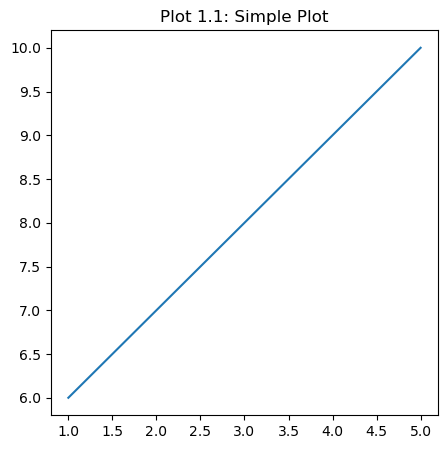

In [2]:
# Generate some data using NumPy arrays
x1 = np.array((1,2,3,4,5)) # x-axis values
y1 = np.array((6,7,8,9,10)) # y-axis values

# Initialize the figure (optional)
fig = plt.figure(figsize=(5,5))

# Use the plot function to plot things
plt.plot(x1,y1)

# Make a title (ultimately optional)
plt.title('Plot 1.1: Simple Plot')

# "Show" the plot
plt.show() # Not necessary for Jupyter notebooks, but is necessary when working interactively on the command line

### 1.1.1 Changing Markers, Line Styles, and Colors <a class="anchor" id="mpl-markers"></a>

Next, let's change the line style, color, and marker styles of our plot.

* The `marker` argument will change your marker style. As you can see in Figure 1.1 above, no markers are assigned by default. Here, we change it to a circle by passing `marker='o'`. More marker styles can be seen here: https://matplotlib.org/stable/api/markers_api.html
* The `ls` argument will change your line style. The default line style is a solid line. Here, we change it to a dashed line by passing `ls='--'`. Similarly, we could have indicated `ls='dashed'`. More line styles can be seen here: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
* The `color` argument will change your color style. The default color is `tab:blue`. Here, we change it to black by passing `color='k'`. More colors can be seen here: https://matplotlib.org/stable/gallery/color/named_colors.html (note that does not include color map options, which we will discuss in Sections 1.3.1 and 1.5).

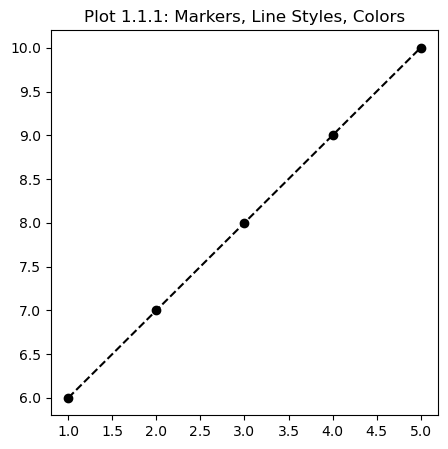

In [3]:
# Generate some data using NumPy arrays
x1 = np.array((1,2,3,4,5)) # x-axis values
y1 = np.array((6,7,8,9,10)) # y-axis values

# Initialize the figure (optional)
fig = plt.figure(figsize=(5,5))

# EDITED
# Use the plot function to plot things
plt.plot(x1,y1, marker='o', ls='--', color='k')

# Make a title
plt.title('Plot 1.1.1: Markers, Line Styles, Colors')

# "Show" the plot
plt.show()

### 1.1.2 Adding Axis Labels, and Legend <a class="anchor" id="mpl-annotations"></a>

Next, let's add some more annotations (axis labels) and a legend.

* The `label` argument will assign a string to a given plot. This will be the label that is used **if a legend is enabled** for a given figure. If a legend is *not* enabled, then nothing will be displayed even if the `label` argument is used. Here we labeled our plot `This is the legend label`
* The `plt.legend()` function will enable the legend for a given figure. Although not used here, size, location and many other parameters can be passed to this function. Please see the "Parameters" and "Other Parameters" list here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
* The `plt.xlabel()` function will set an x-axis label for your plot. Here, we named it `X-data`.
* The `plt.ylabel()` function will set a y-axis label for your plot. Here, we named it `Y-data`.

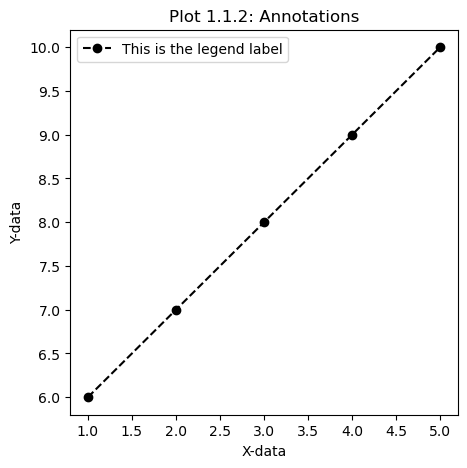

In [4]:
# Generate some data using NumPy arrays
x1 = np.array((1,2,3,4,5)) # x-axis values
y1 = np.array((6,7,8,9,10)) # y-axis values

# Initialize the figure (optional)
fig = plt.figure(figsize=(5,5))

# EDITED
# Use the plot function to plot things
plt.plot(x1,y1, marker='o', ls='--', color='k', label='This is the legend label')

# NEW
# Add some annotations
plt.xlabel('X-data')
plt.ylabel('Y-data')
plt.legend() # required for the legend "label" to show up

# Make a title
plt.title('Plot 1.1.2: Annotations')

# "Show" the plot
plt.show()

### 1.1.3 Convert to "Axes" API <a class="anchor" id="mpl-axes"></a>

Although the `plt.figure()` function is nice for simple standalone plots, it is fairly limited in how you can customize things. To highly configure your figures it is recommended to use the `plt.subplots()` function instead. This will also allow you to use pyplot's Axes API to control your plotting. In this mode, each subplot (even if there is just one) is assigned an "axis" which can then be used for tighter control over individual plots of a given figure. Switching to this mode also means switching some of the function names we've already covered. Commonly, this just switches function names to be `set_[parameter]`. For example, instead of `xlabel()` it is now `set_xlabel()`.

For more information on the Axes class and API, please see: https://matplotlib.org/stable/api/axes_api.html

The `plt.subplots()` function enables the use of subplots and axes. As opposed to just `fig = plt.figure()` returning a figure, `fig, ax = plt.subplots()` returns both a Figure AND an array of Axes. To modify a given subplot, you will then use `ax` to indicate which subplot you want to modify. In the case of one subplot, all you have to specify is `ax`; however, in the case of multiple subplots, you would have to specify the index of the subplot (discussed in Section 1.1.6).

Here, all that is changed is switching to the Axes class/API.

* The `nrows` and `ncols` arguments are used to indicate how many rows and columns of subplots exist in one figure. Here, we indicate 1 for both arguments because we only have one subplot we're interested in.
* Instead of `plt.plot()` we now use `ax.plot()`
* Instead of `plt.xlabel()` and `plt.ylabel()`, we now use `ax.set_xlabel()` and `ax.set_yabel()`
* Instead of `plt.legend()` we now use `ax.legend()`
* Instead of `plt.title()` we now use `ax.set_title()`

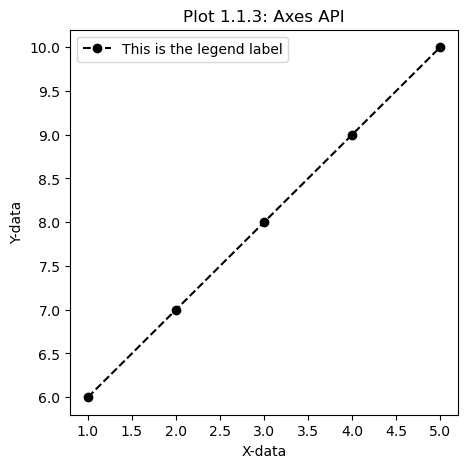

In [5]:
'''
Note that when using subplots you might see plt.subplot(111), or fig.add_subplot(...), but outdated and less versatile
'''

# Generate some data using NumPy arrays
x1 = np.array((1,2,3,4,5)) # x-axis values
y1 = np.array((6,7,8,9,10)) # y-axis values

# EDITED
# Initialize the figure to access Axes parameters and subplots (not optional anymore)
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(5,5))

# EDITED
# Use the plot function to plot things
ax.plot(x1,y1, marker='o', ls='--', color='k', label='This is the legend label')

# EDITED
# Add some annotations
ax.set_xlabel('X-data')
ax.set_ylabel('Y-data')
ax.legend()

# EDITED
# Make a title
ax.set_title('Plot 1.1.3: Axes API')

# "Show" the plot
plt.show()

### 1.1.4 Adding More Data (How a figure behaves when doing so) <a class="anchor" id="mpl-add"></a>

Next, let's add some more data to the same plot.

Here, we generated additional fake data via `x2` and `y2`, and added a new `ax.plot()` instance. Because this additional call to `plot()` uses the same `ax` axis, the new data will be plotted in the same figure on the same subplot.

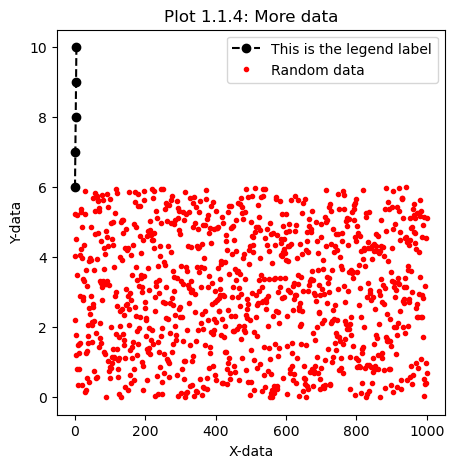

In [6]:
# Generate some data using NumPy arrays
x1 = np.array((1,2,3,4,5)) # x-axis values
y1 = np.array((6,7,8,9,10)) # y-axis values

# NEW
# Generate additional data using a random generator
x2 = np.linspace(0,1000,1000) # start, stop, num
y2 = np.random.rand(1000)*6. # num, from interval [0,1) by default. Multiplying by 6 turns it into [0,6)

# Initialize the figure
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(5,5))

# Use the plot function to plot things
ax.plot(x1,y1, marker='o', ls='--', color='k', label='This is the legend label')
# NEW
ax.plot(x2,y2, marker='.', ls='', color='r', label='Random data')

# Add some annotations
ax.set_xlabel('X-data')
ax.set_ylabel('Y-data')
ax.legend()

# Make a title
ax.set_title('Plot 1.1.4: More data')

# "Show" the plot
plt.show()

### 1.1.5 Changing Limits and Spacing <a class="anchor" id="mpl-limits"></a>

Note that our plot window is a bit stretched now because of the new `x2` and `y2` data. So, this is a nice opportunity to showcase how to change your axis limits. Because of the x-axis extent being quite large, this is also a good opportunity to show how to use logarithmic spacing along a given axis.

* The `ax.set_xscale()` function allows you to set the scale of a given axis. Here, we set the x-axis scale to be `'log'` (base 10 by default).
* The `set_xlim()` function allows you to set the x-axis limits of your plot. Here, we set the minimum (left side) to be `0.1` and the maximum (right side) to be `500`. Note that if you're modifying the scale, it is generally best to set your scale first before setting any axis limits.

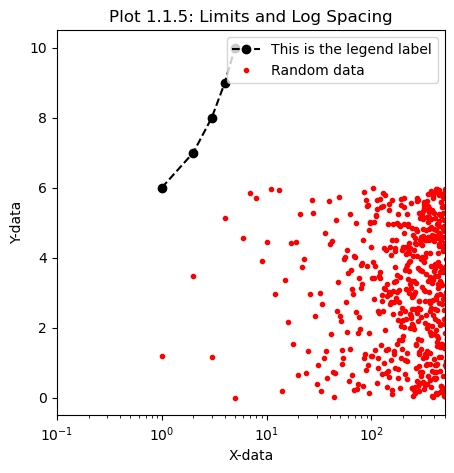

In [7]:
# Generate some data using NumPy arrays
x1 = np.array((1,2,3,4,5)) # x-axis values
y1 = np.array((6,7,8,9,10)) # y-axis values

# Generate additional data using a random generator
x2 = np.linspace(0,1000,1000) # start, stop, num
y2 = np.random.rand(1000)*6. # num, from interval [0,1) by default. Multiplying by 6 turns it into [0,6)

# Initialize the figure
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(5,5))

# Use the plot function to plot things
ax.plot(x1,y1, marker='o', ls='--', color='k', label='This is the legend label')
ax.plot(x2,y2, marker='.', ls='', color='r', label='Random data')

# NEW
# Set axis limits (good practice to set scale first then do limits, annotations, legends, etc. afterwards)
ax.set_xscale('log')
ax.set_xlim(.1,500)

# Add some annotations
ax.set_xlabel('X-data')
ax.set_ylabel('Y-data')
ax.legend()

# Make a title
ax.set_title('Plot 1.1.5: Limits and Log Spacing')

# "Show" the plot
plt.show()

### 1.1.6 Making Subplots <a class="anchor" id="mpl-subplots"></a>

Although changing the axis limits and the scale of the plot seemed to help, it would probably be best if these two plots were on different subplots. So, next we will move the plotting of `y2` versus `x2` into an additional subplot on the same figure.

* We increased the number of columns using `ncols=2`, thus creating a second axis to place the new subplot.
* Since we've added a new column, we increased the `figsize` to be double the size in X-space. Doubling the figure size in X in this manner will make it so that both subplots will be roughly the same size that we've seen in our previous figures (i.e., we've double the amount of columns, so we should double in that direction to keep things consistent or else things would look small).
* All instances of `ax.plot()` now must indicate the specific axis index so that the correct data is placed in the desired subplot. `ax[0].plot()` plots data in the first subplot/column, while `ax[1].plot()` plots data in the second subplot/column.
* Similarly all other instances of `ax.function_name()` must indicate a given index as well. Here, we only applied it to `ax[1]` just as an example. You can see that this causes all the axis limits and annotation settings to **only** be applied to the second subplot, while the first column does not get any of those settings. We will "fix" this in the next subsection.
* The `plt.suptitle()` function can be used to create an overall title for a figure with multiple subplots.

> **WARNING:** When you have multiple columns **AND** multiple rows, your instances of `ax[i]` will change into `ax[row_index,col_index]`

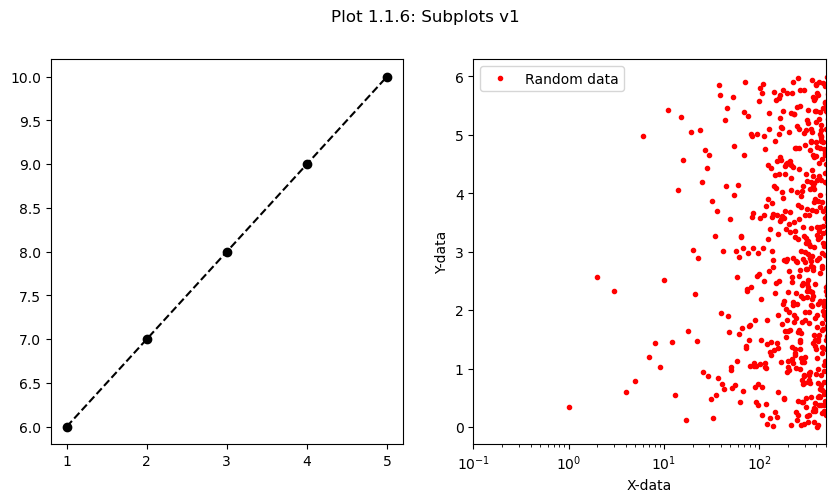

In [8]:
# Generate some data using NumPy arrays
x1 = np.array((1,2,3,4,5)) # x-axis values
y1 = np.array((6,7,8,9,10)) # y-axis values

# Generate additional data using a random generator
x2 = np.linspace(0,1000,1000) # start, stop, num
y2 = np.random.rand(1000)*6. # num, from interval [0,1) by default. Multiplying by 6 turns it into [0,6)

# EDITED
# Initialize the figure
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,5))

# EDITED
# Use the plot function to plot things
ax[0].plot(x1,y1, marker='o', ls='--', color='k', label='This is the legend label')
ax[1].plot(x2,y2, marker='.', ls='', color='r', label='Random data')

# EDITED
# Set axis limits
ax[1].set_xscale('log')
ax[1].set_xlim(.1,500)

# EDITED
# Add some annotations
ax[1].set_xlabel('X-data')
ax[1].set_ylabel('Y-data')
ax[1].legend()

# NEW
# Overall title using 'suptitle'
plt.suptitle('Plot 1.1.6: Subplots v1')

# "Show" the plot
plt.show()

#### Applying Settings to all Subplots

As noted above, we applied a lot of the settings only to column 2 (`ax[1]`), so let's apply the settings to all of our subplots using a loop. Additionally, let's add  back individual subplot titles using `ax[0].set_title()` and `ax[1].set_title()`.

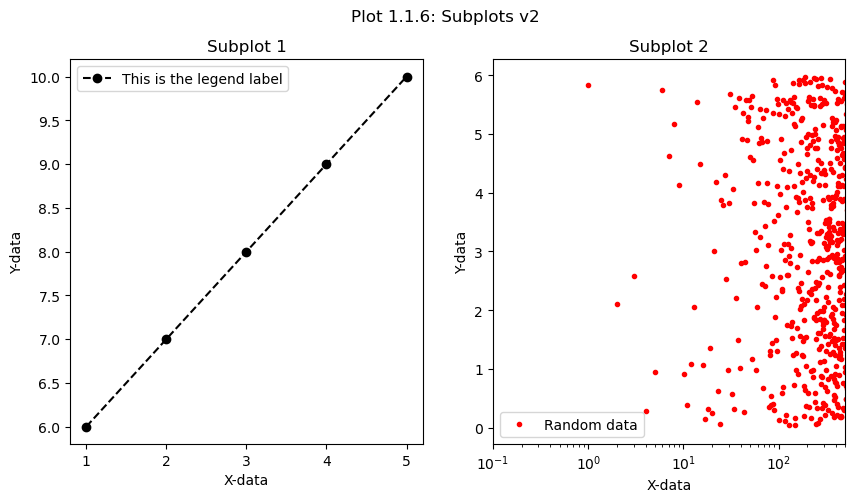

In [9]:
# Generate some data using NumPy arrays
x1 = np.array((1,2,3,4,5)) # x-axis values
y1 = np.array((6,7,8,9,10)) # y-axis values

# Generate additional data using a random generator
x2 = np.linspace(0,1000,1000) # start, stop, num
y2 = np.random.rand(1000)*6. # num, from interval [0,1) by default. Multiplying by 6 turns it into [0,6)

# Initialize the figure
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,5))

# Use the plot function to plot things
ax[0].plot(x1,y1, marker='o', ls='--', color='k', label='This is the legend label')
ax[1].plot(x2,y2, marker='.', ls='', color='r', label='Random data')

# Set axis limits
ax[1].set_xscale('log')
ax[1].set_xlim(.1,500)

# EDITED
# Add some annotations
plot_rows=2
for i in range(0,plot_rows):
    ax[i].set_xlabel('X-data')
    ax[i].set_ylabel('Y-data')
    ax[i].legend()
    ax[i].set_title(f'Subplot {i+1}')

# Overall title using 'suptitle'
plt.suptitle('Plot 1.1.6: Subplots v2')

# "Show" the plot
plt.show()

This ends the workflow for modifying our simple plot over time to showcase the overall structure of a figure. Next we will cover more specialized plots you may encounter.

## 1.2 Bar charts <a class="anchor" id="mpl-bars"></a>

The `bar()` function can be used to make bar graphs. In this example, each bar is a `fruit` (x-axis data) and a given `count` is the height of the bar (y-axis data). Similar to the other plots we've made, it also accepts a `label` and `color` argument.

* Defining a label with an `_` makes the label not appear in the generated legend. Here, this was used with `_red` so that it wouldn't duplicate the `red` entry twice in the legend because of our `cherry` entry (we already did it for `apple`).

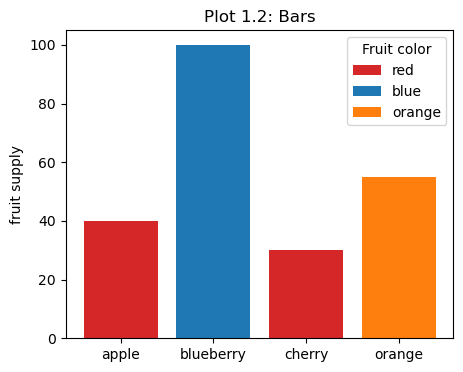

In [10]:
'''
####### Method 1: Generates bar chart using strings for x-axis ######
'''

# Initialize the figure
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,4))

# Bar Data
fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange'] # "_red" will use the same label as the original "red" without duplicating it in the legend
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

# Plot the bars
ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

# Annotations
ax.set_ylabel('fruit supply')
ax.set_title('Plot 1.2: Bars')
ax.legend(title='Fruit color')

# "Show" the plot
plt.show()

### 1.2.1 Grouped Bar Charts <a class="anchor" id="mpl-group-bars"></a>

Although strings can be used to place bars on the x-axis, numerical data can also be used to do so. This allows for additional flexibility when creating widths of bars, or if you need to group specific bars together.

* Here, we use numerical data to define the `width` of each bar and use it to establish the x-coordinates of each bar by defining an `offset`.
* We also take this opportunity to show that you can plot each bar individually; however, this is not necessary and a comment is included that shows the syntax for doing things with one execution of `ax.bar()` (similar to Section 1.2 above).
* The `set_xticks()` function can be used to set tick locations and tick labels along the x-axis. You can pass this function lists or arrays that will represent aspects of the ticks. Here, we pass the tick coordinates and their labels. If not included, this would uniformly distribute the ticks across the x-axis, which wouldn't worked for our grouped bars.

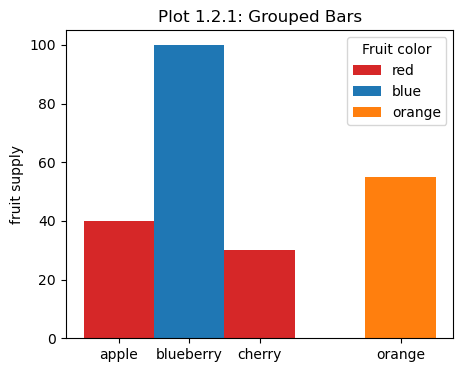

In [11]:
'''
####### Method 2: Generates the same plot, but deals with numerical data for x-axis ######
'''

# Initialize the figure
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,4))

# Bar Data
fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange'] # "_red" will use the same label as the original "red" without duplicating it in the legend
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

# NEW
# Bar plot parameters
num_bars = 4
width_bars = (1.0/num_bars)
offset = np.array((0.,width_bars, 2.*width_bars, 4.*width_bars)) # coordinates of each bar

# EDITED
# Plot each bar individually
for i in range(0,num_bars):
    ax.bar(offset[i], counts[i], width=width_bars, label=bar_labels[i], color=bar_colors[i])
#ax.bar(offset,counts,width=width_bars,label=bar_labels, color=bar_colors)

# NEW
# Setup tick locations and names
ax.set_xticks(ticks=offset, labels=fruits) # if you don't include this, then it will uniformly distribute ticks across the numerical limits of "fruits"

# Annotations
ax.set_ylabel('fruit supply')
ax.set_title('Plot 1.2.1: Grouped Bars')
ax.legend(title='Fruit color')

# "Show" the plot
plt.show()

## 1.3 Histograms <a class="anchor" id="mpl-hists"></a>

Histograms can be used to highlight data distributions over a set of bins.

* Here we define a random normal (Gaussian) data distribution of size `N_points`.
* In `dist1` the distribution is centered about `0`, while `dist2` is centered about `loc=10.0`.
* The data is plotted in a histogram using the `hist()` function across a desired number of `bins`.

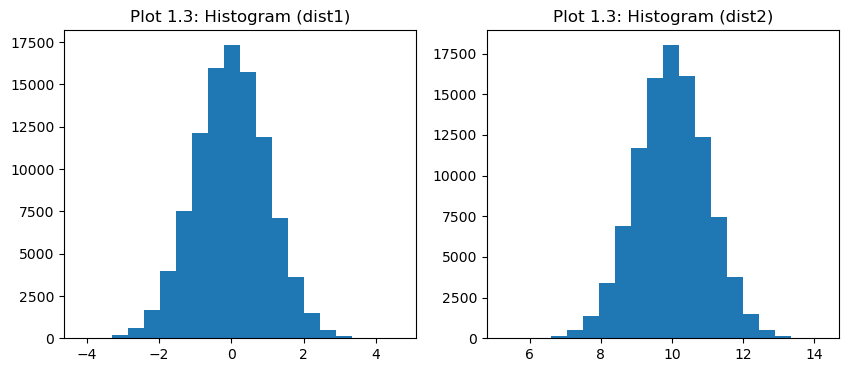

In [12]:
# Histogram parameters
N_points = 100000
n_bins = 20

# Generate distributions
dist1 = np.random.normal(size=N_points)
dist2 = np.random.normal(loc=10.0,size=N_points)

# Initialize the figure
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))

# Make histograms
ax[0].hist(dist1, bins=n_bins)
ax[1].hist(dist2, bins=n_bins)

# Title
ax[0].set_title('Plot 1.3: Histogram (dist1)')
ax[1].set_title('Plot 1.3: Histogram (dist2)')

# "Show" the plot
plt.show()

### 1.3.1 2D Histograms and Colorbars <a class="anchor" id="mpl-2dhists"></a>

2D Histograms are also possible in Matplotlib via the `hist2d()` function. This can be used to plot two data distributions against each other instead of individually. 2D Histograms use colormaps and colorbars to help visualize data.

* Here, we plot `dist2` versus `dist1` across 80 and 20 bins, respectively -- we assign this plot to a variable called `hist`.
* The `plt.colorbar()` function is used to create a colorbar for a given figure. The main argument it accepts is the variable that represents a given plot. Because we assigned our 2D histogram to the `hist` variable, this is what we pass to the colorbar function to create a colorbar distribution for the data. Note that in the case of 2D histograms, `hist[3]` specifically must be passed, but in general you can just pass the entire variable (see `im` in Section 1.5). Additionally, the colorbar function can accept multiple configuration arguments, like `location`, `orientation`, and a `label`.
* Included in comments below is an additional method to implement a colorbar by manually creating axes for it. Using this method to create a colorbar makes it much more configurable, as you will have tighter control over the height, width, ticks, and placement of your colorbar relative to a given figure. After creating an axis for a prospective colorbar with `fig.add_axes()`, you can then pass that axis to the `cax` argument in `plt.colorbar()` to actually use it. Creating a colorbar this way also doesn't shrink your plot of the data itself -- the "automatic"/"standard" method tends to do that by default, unfortunately.

More details about colorbar settings can be found here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html

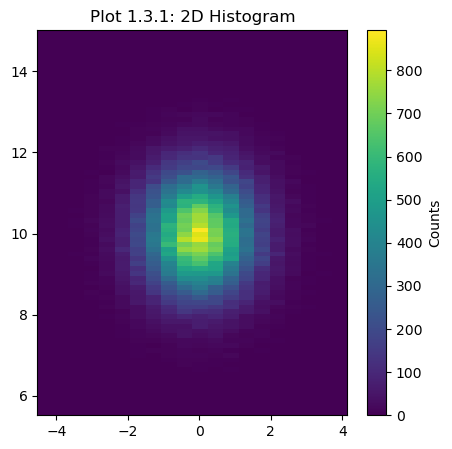

In [13]:
# Histogram parameters
N_points = 100000

# Generate distributions
dist1 = np.random.normal(size=N_points)
dist2 = np.random.normal(loc=10.0,size=N_points)

# Initialize the figure
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5))

# NEW
# Make 2D histogram
hist = ax.hist2d(dist1, dist2, bins=(20,80), cmap='viridis')

# NEW
# Standard Colorbar Method
# hist[3] is used **in this case** because of how histograms display data
# See Section 1.5 for a more "general" use-case
cbar=plt.colorbar(hist[3],location='right', orientation='vertical', label='Counts')

# NEW
# Customizeable Colorbar Method
#cbaxes = fig.add_axes([.91, .11, .1, 0.77]) # Format: left edge position, bottom edge position, width, height
#cbar=plt.colorbar(hist[3], orientation='vertical',cax=cbaxes)
#cbaxes.yaxis.set_ticks_position('right') # must come AFTER plt.colorbar call
#cbar.set_label('Counts',rotation=90,size=10, loc='center') # x=, y= can also be called here to set location of label (y for vertical cbars, x for horizontal cbars)

# Title
ax.set_title('Plot 1.3.1: 2D Histogram')

# "Show" the plot
plt.show()

## 1.4 3D Plots <a class="anchor" id="mpl-3d"></a>

Plotting 3D data in Matplotlib isn't *too* common due to other tools handling 3D data better; however, simple datasets that aren't that large can still be visualized in Matplotlib.

In this example, we will generate random points in the form of a cube, but only plot a specific selection of them that are within a radius of 1 relative to the center of the domain (i.e., a sphere of radius 1 centered at 0).

Here, we generate 1000 random `x`, `y`, and `z` datapoints confined to a domain of [-1,1) using the `np.random.rand()` function. Next, we calculate how far in radius (`r`) each point is from the center of the domain (0), and slice the data so that we only get data with `r<=1`.

**The key to getting a 3D plot to work in Matplotlib is to use the `subplot_kw={'projection': '3d'}` keyword argument in `plt.subplots()`.**

Next, we use the `scatter()` function to make a scatter plot of all of our points within r=1. Alternatively, you can use the `plot()` function which can be configured to look like a scatter plot by passing certain markers and line styles.

*An aside:* This example is a convenient introduction into Monte Carlo methods. Using our initial random distribution of samples (which form a cube-like object), we can try and estimate the volume of a sphere just by 1) knowing the number of datapoints lying in the "sphere" (i.e., the number of points within r=1), and 2) knowing the total number of points in general. The number of points that land in the sphere divided by total number of points in the box is equivalent to the ratio of their volumes. So, multiplying the ratio between points to the volume of the "cube" will estimate the volume of the sphere. The more you increase the sample size, the better the estimate should be (in theory).

For more examples of 3D plots in Matplotlib, see: https://matplotlib.org/stable/gallery/mplot3d/index.html

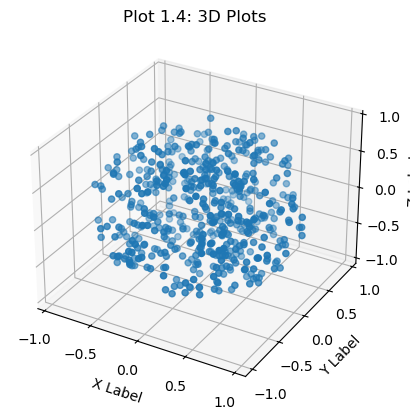

Real volume of a sphere of r=1 is 4.1887902047863905
Approximate volume is 4.2


In [14]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# Create random data from [-1,1), Math: [0,1) --> [0,2) --> [-1,1)
x = ( 2. * np.random.rand(1000) ) - 1.
y = ( 2. * np.random.rand(1000) ) - 1.
z = ( 2. * np.random.rand(1000) ) - 1.

# Extract points within a r=1 sphere
r = np.sqrt(x**2 + y**2 + z**2)
x_sphere = x[ r<=1 ]
y_sphere = y[ r<=1 ]
z_sphere = z[ r<=1 ]

# Initialize the 3D figure
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

# Make a scatter plot with either the "scatter" method or just plotting with "plot" without a linestyle
ax.scatter(x_sphere,y_sphere,z_sphere, marker='o')
#ax.plot(x_sphere,y_sphere,z_sphere, marker='.', ls='', alpha=0.5)

# Annotations
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Plot 1.4: 3D Plots')

# "Show" the plot
plt.show()

# Just for fun, this is a good example of a very intro Monte Carlo problem

N_box = 1000. # total number of random points within [-1,1]
N_sphere = len(r[r<=1.]) # number of points within the sphere

vol_box = 2.**3.
vol_sphere = vol_box*(N_sphere/N_box)

print('Real volume of a sphere of r=1 is', (4./3.)*np.pi)
print('Approximate volume is', vol_sphere)

## 1.5 Pseudocolor Plots (plotting grid data) <a class="anchor" id="mpl-pseudo"></a>

Finally, the last specialized Matplotlib plot we will cover is a Pseudocolor plot (these are sometimes called heatmap plots in certain fields). A pseudocolor plot visualizes data tied to a grid or mesh. Typically, a rectangular 2D grid will contain `N_x` and `N_y` number of cells, with `N_x+1` and `N_y+1` number of cell edges. Data itself is typically assigned to the center of each cell, so there are `N_x * N_y` number of datapoints to visualize. Some matplotlib examples use `imshow` to accomplish this, but that is typically only sufficient for uniformly spaced "square" grid data where each dimension matches in number of points and extents -- it is also much more limited. The better option, in general, is to use `pcolormesh` instead.

In this example, we use the `pcolormesh()` function to visualize the data on our grid.

In the first section we setup the mesh/grid:

* First, we create the grid cell edges using NumPy. Ideally, mesh/grid coordinates can just be imported from any data file that you may be working with, but here we create it manually. In this example, our mesh is in 2D spherical coordinates (r, theta). Theta in this example refers to the "polar" angle (0 to 180 degrees).
* Next, we get the center coordinates of each cell, which we will use to create "fake" cell data. There are 1000 radial cells and 180 theta cells.
* We then create the grid using the `meshgrid()` function in numpy, this will map all of our cell edges along each dimension.
* Finally, we convert the grid from spherical to cartesian coordinates for more understandable visualization later

In the second section we generate some fake data onto our mesh:

* We use the cell center coordinates of each radial cell to generate some fake gravitational potential data.
* Next, we copy that fake data across all of the theta dimension (i.e., copy it 180 times)
* Ideally you wouldn't have to do either of those 2 above steps and would just have data already

In the final section we actually plot things:

* We use the `pcolormesh()` function which expects the grid edges in the form of a mesh -- in our case this is `x` and `y`. The third argument it expects is the data itself. The data argument should be of the same shape as the edges or 1 less in each dimension (i.e., it's data of a cell center) -- recall, there are N+1 cell edges for each cell in a grid. In our case, we pass our `-pot` data which represents the cell centers of the grid. Note: we used `-pot` instead of `pot` out of personal preference for data values.
* The `LogNorm` package can be used in the `norm` argument to visualize the data on a logarithmic scale.
* Because we assigned the `pcolormesh` plot to the variable `im`, we can use it to generate a colorbar.
* Instead of a title using `plt.title()` we opt for the `text()` function to place our title for flexibility of placement.
* Using the `set_aspect(aspect='equal')` function makes it so that the scale of a cell are equal and not automatically stretched in odd ways to fit certain figure sizes or dimension extents (is recommended if your x- and y-axis extents aren't the same, as is the case here).

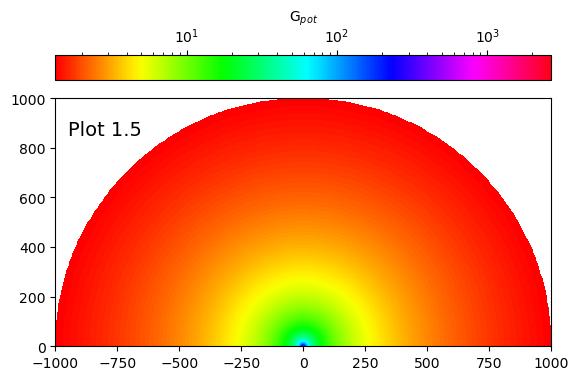

Minimum of -gpot is: 1.335167583791896
Maximum of -gpot is: 2669.0


In [15]:
from matplotlib.colors import LogNorm

# Constants
G = 6.6725e-8 # gravitational constant in CGS units
M = 2.e10 # mass in grams

##### Creating a mesh/grid #####

# Set up coordinates to mimic a mesh grid (i.e., cell edges)
r_edge = np.linspace(0,1000,1001) # centimeters
t_edge = np.linspace(0.,180.,181) # degrees

# Get the center of each cell
# Cell centers will be of dimension 1 less than cell edges (e.g., 180 values instead of 181)
r_ctr = (r_edge[1:] + r_edge[:-1])/2.
t_ctr = (t_edge[1:] + t_edge[:-1])/2.

# Create the grid
r_grid, t_grid = np.meshgrid(r_edge,t_edge)

# Convert to cartesian coordinates
x = r_grid*np.cos(t_grid*np.pi/180.)
y = r_grid*np.sin(t_grid*np.pi/180.)

################################


##### Generating fake data #####

# Generate gravitational potential data for each cell center
pot = -G*M/r_ctr

# Duplicate the array so that it's of dimension 180x1000 (matches the number of cell centers in our grid)
# Format is: tile(array, (repeat rows, repeat columns) )
# A value of 1 means don't repeat anything in a given dimension
pot = np.tile(pot,(180,1))

################################

# Initialize the figure
fig, ax = plt.subplots()

# Generate the pseudocolor plot
# Depending on the shape of your data/mesh, sometimes you'll need to take the transpose of your data (e.g., pot.T) -- not the case here
# You'll get an error message mentioning a shape mismatch if you need to

# Basic Pcolormesh Usage
#im = ax.pcolormesh(x,y,-pot)

# A more refined visualization
im = ax.pcolormesh(x,y,-pot, norm=LogNorm(vmin=np.amin(-pot), vmax=np.amax(-pot)), cmap='hsv')

# Making a title using the "text" function
# Doing this instead of a "set_title" (optional)
ax.text(x=-950, y=850, s='Plot 1.5', size=14 )

# Colorbar
cbar=plt.colorbar(im,location='top', orientation='horizontal', label=r'G$_{pot}$')

# Makes sure the cells in the x and y direction have the same aspect ratio
ax.set_aspect(aspect='equal') # may need to play around with the location of this in the future (sometimes it needs to go before or after colorbars)

# "Show" the plot
plt.show()

# Print maximum and minimum values
print('Minimum of -gpot is:', np.amin(-pot))
print('Maximum of -gpot is:', np.amax(-pot))

# 2. Pandas <a class="anchor" id="pandas"></a>

Pandas is useful when you're dealing with CSV or other tabulated data sources. It has plotting capability inherently and uses Matplotlib/pyplot behind the scenes.

First, let's cover a bit of Pandas (very briefly). I suggest looking at the Pandas User Guide for more thorough information on what Pandas can do and how to use it: https://pandas.pydata.org/docs/user_guide/index.html

> Note: Recall that we imported Pandas earlier as `pd`

#### DataFrames

In [16]:
# How to create a Pandas DataFrame manually
df = pd.DataFrame( np.array( ([1,2,3] , [4,5,6] , [7,8,9]) ), columns=['a','b','c'] )
df

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


#### Manipulating Pandas DataFrames

In [17]:
# Reading a CSV DataFrame
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [18]:
# DataFrames can be sliced

# Extract certain rows
iris[:4]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


In [19]:
# Extract an entire row with "loc" -- accepts integers or labels (integers will be interepreted as labels, actually)
iris.loc[1]

sepal_length       4.9
sepal_width        3.0
petal_length       1.4
petal_width        0.2
species         setosa
Name: 1, dtype: object

In [20]:
# Extract certain columns of a row using "loc"
# Format is (row,column)
iris.loc[1,'sepal_length':'petal_width'] # Inclusive endpoints

sepal_length    4.9
sepal_width     3.0
petal_length    1.4
petal_width     0.2
Name: 1, dtype: object

In [21]:
# Extract certain columns of a row using "iloc" (only accepts integers)
# Format is (row,column)
iris.iloc[1,0:3] # Exclusive endpoint (as per "normal" python slicing)

sepal_length    4.9
sepal_width     3.0
petal_length    1.4
Name: 1, dtype: object

In [22]:
# To get the range of indices
iris.index

RangeIndex(start=0, stop=150, step=1)

In [23]:
# DataFrames can return data based on a known label
print(iris['species'])

print('\n', iris["species"].value_counts() )

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


## 2.1 Plotting a Pandas DataFrame <a class="anchor" id="pandas-plot"></a>

A Pandas DataFrame can be plotted directly via the `plot()` method. If you have a dataframe named `df` then you would use `df.plot()`.

By default, Pandas will plot data against the index value of each row (for every named column). If you're using the Axes API, you can pass `ax` arguments via `df.plot(ax=name_of_axes)`. In our case, the name of our axis is `ax`, so we use `df.plot(ax=ax)`.

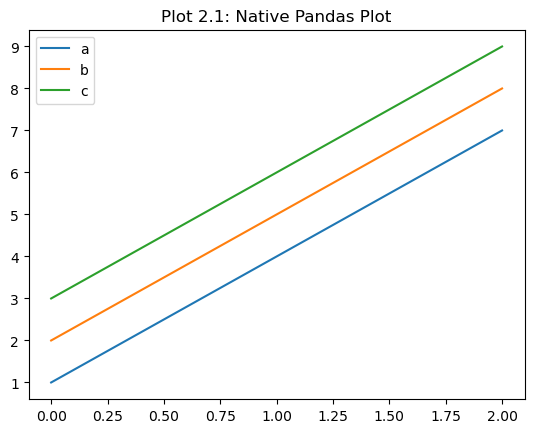

In [24]:
# Create a Pandas DataFrame
df = pd.DataFrame( np.array( ([1,2,3] , [4,5,6] , [7,8,9]) ), columns=['a','b','c'] )

# Initialize the figure
fig, ax = plt.subplots(nrows=1,ncols=1)

# Plot via Pandas
df.plot(ax=ax) # if not using the Axes API method (i.e., "ax"), then don't need this argument

# Title
plt.title('Plot 2.1: Native Pandas Plot')

# "Show" the plot
plt.show()

### 2.1.1 Comparison to Matplotlib <a class="anchor" id="pandas-compare"></a>

Although you can inherently plot a DataFrame via `df.plot()`, you can also use Matplotlib directly via `ax.plot(df)` (or even `plt.plot(df)`). This will result in similar plots, with the one caveat being the Pandas method automatically generates a legend for you behind the scenes based on the column names.

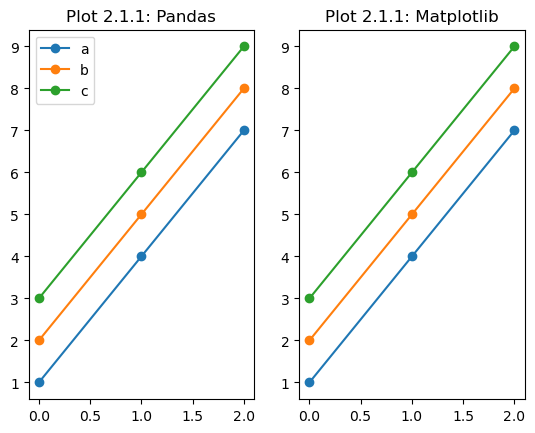

In [25]:
# Create a Pandas DataFrame
df = pd.DataFrame( np.array( ([1,2,3] , [4,5,6] , [7,8,9]) ), columns=['a','b','c'] )

# EDITED
# Initialize the figure
fig, ax = plt.subplots(nrows=1,ncols=2)

# EDITED
# Plot via Pandas
df.plot(marker='o',ax=ax[0])

# NEW
# Plot via Matplotlib
ax[1].plot(df,marker='o')

# EDITED
# Title
ax[0].set_title('Plot 2.1.1: Pandas')
ax[1].set_title('Plot 2.1.1: Matplotlib')

# "Show" the plot
plt.show()

## 2.2 Reading and Plotting CSV DataFrames <a class="anchor" id="pandas-csv"></a>

Instead of generating our own DataFrame using NumPy+Pandas, let's read in a premade CSV dataset. For more information on the Iris dataset, see: https://archive.ics.uci.edu/dataset/53/iris

In [26]:
# Reading data into a DataFrame (e.g., CSV file)
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In this case, our DataFrame is no longer named `df` and is named `iris`, so to plot it we will use `iris.plot()`.

Instead of using the default plot configurations, let's make it a scatter plot this time using the `kind='scatter'` argument. More specifically, let's make a scatter plot of the `sepal_length` and `sepal_width` columns.

> Note: A Matplotlib equivalent plot line is given in the comments.

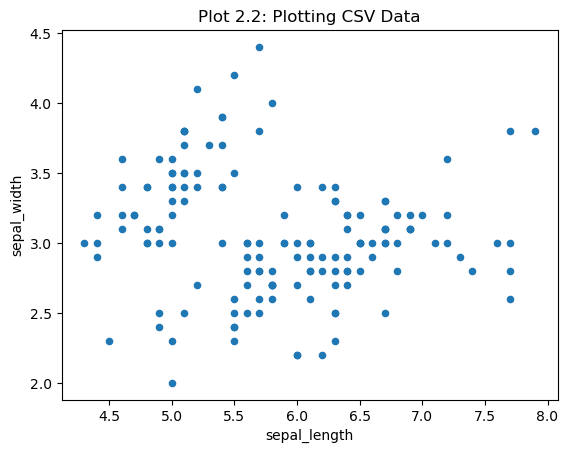

In [27]:
# Read in DataFrame
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# Initialize the figure
fig, ax = plt.subplots(nrows=1,ncols=1)

# Plot
iris.plot(kind='scatter', x="sepal_length", y="sepal_width", ax=ax)

# Matplotlib equivalent
#ax.plot(iris['sepal_length'], iris['sepal_width'], 'o')

# Title
plt.title('Plot 2.2: Plotting CSV Data')

# "Show" the plot
plt.show()

## 2.3 Plotting DataFrames with Seaborn <a class="anchor" id="pandas-seaborn"></a>

Seaborn is a visualization library that can extend plotting Pandas DataFrames to a whole new level. Seaborn is a library for making statistical graphics in Python. It builds on top of Matplotlib and integrates closely with Pandas data structures.

> Note: Recall that we imported Seaborn earlier as `sns`

In [28]:
# Here, we switch from matplotlib's default graph style to seaborn's default graph style.
# I chose to use seaborn's default set which displays graph lines inside the graph's 
# space; this is in contrast to matplotlib which doesn't display grid lines by default

# UNCOMMENT THIS TO ENABLE WHAT ABOVE WAS TALKING ABOUT
sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

The below is a similar script to what we used in Section 2.2, but using Seaborn's `lineplot()` function instead. By default, `sns.lineplot(x=..., y=..., data=...)` will estimate the mean of data by aggregating over multiple y values at each x value. It will then plot that mean as a line, as well as a shaded/shadow region which represents the confidence interval (95% by default).

For more information about the `lineplot()` method, see: https://seaborn.pydata.org/generated/seaborn.lineplot.html

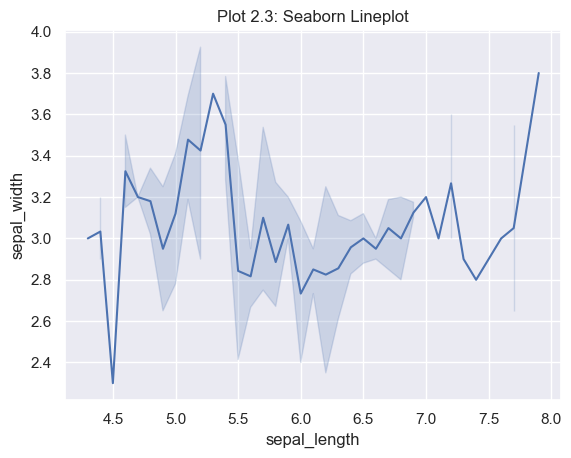

In [29]:
# Read in DataFrame
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# Initialize the figure
fig, ax = plt.subplots(nrows=1,ncols=1)

# Lineplot  
sns.lineplot(x="sepal_length", y="sepal_width", data=iris, ax=ax) 
  
# Title
ax.set_title('Plot 2.3: Seaborn Lineplot')

# "Show" the plot
plt.show()

### 2.3.1 Specialized Seaborn Plots (why we can't always do what we're used to) <a class="anchor" id="seaborn-special"></a>

The `jointplot()` method by default will generate a scatter plot of data as well as automatically generate histograms of the same data to be displayed around the edges of the figure. Behind the scenes this API call runs both `sns.scatterplot()` and `sns.histplot()`. For more information on JointPlot, see: https://seaborn.pydata.org/generated/seaborn.jointplot.html

Unfortunately, when using more specialized Seaborn plots like this, it blocks us from our usual workflow of initializing figures and axes using `plt.figure()` or `plt.subplots()`. This is because behind the scenes Seaborn already does that for us, so any additional instances of that in the code will just generate blank figures and Seaborn will **not** utilize them.

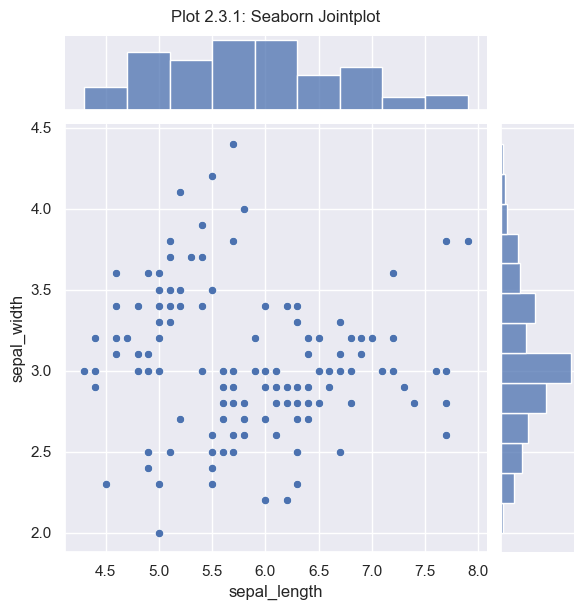

In [30]:
'''
Why we can't initialize figures the "matplotlib way" with certain Seaborn plots:

https://stackoverflow.com/questions/60147736/how-to-put-seaborn-graphs-into-subplots
https://stackoverflow.com/questions/35042255/how-to-plot-multiple-seaborn-jointplot-in-subplot
https://stackoverflow.com/questions/69833665/seaborn-subplot-of-jointplots-doesnt-work

'''

# Read in DataFrame
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# Jointplot  
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, height=6) #, kind='scatter')

# Title
plt.title('Plot 2.3.1: Seaborn Jointplot', y=1.22)

# "Show" the plot
plt.show()

# Saving JointPlot figures with titles require bbox_inches='tight' parameter so that titles aren't cut off
#plt.savefig('figure_name', bbox_inches='tight')


The `FacetGrid()` plot is another useful Seaborn method. This one is a bit confusing in general, so I suggest reading this: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html .

That being said, I still think it's a bit confusing (or more confusing?) even after that, so it may be worth googling other tutorials as well to get more of an idea of what it can do. Essentially, it's able to plot conditional relationships between different data in a given DataFrame. Typically it's used to create a handful of subplots that relate to each other.

However, when using it with the `hue` parameter, it's able to associate each datapoint with a different color based on a given column. Here, the column we tell it to make a `hue` out of is `species`, so it sorts the data and assigns each unique `species` a color based on a given color palette (in our case the `husl` palette). We then map that relationship to the `plt.scatter()` function and indicate which data columns will be used for that scatter (`sepal_length` and `sepal_width`).

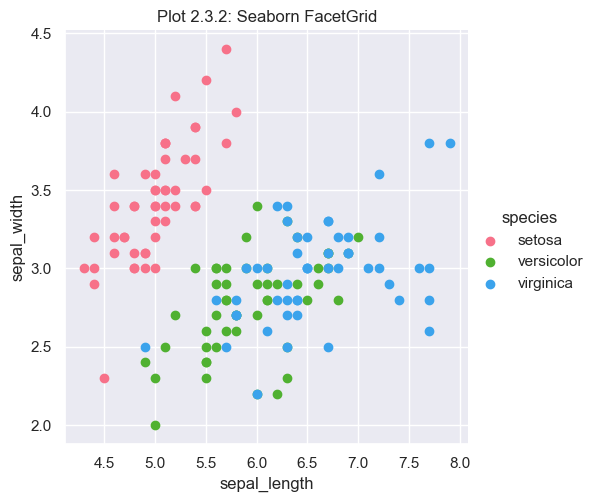

In [31]:
# Read in DataFrame
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# FacetGrid Plot  
sns.FacetGrid(iris, hue="species", palette="husl", height=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

# Title
plt.title('Plot 2.3.2: Seaborn FacetGrid')

# "Show" the plot
plt.show()

# 3. Misc. Extra Info <a class="anchor" id="extra"></a>

## 3.1 Reading in data with NumPy <a class="anchor" id="numpy"></a>

The `loadtxt()` and `genfromtxt()` functions in NumPy can be useful for reading in certain data files (commonly text or CSV files). Here's an example text file called `numpy_test.txt`:

```
# SOME METADATA
# MORE METADATA
# EVEN MORE METADATA
col_a col_b col_c col_d

0 ,   1,  2,  3
4 ,   5,  6,  7
8 ,   9, 10, 11
12,  13, 14, 15
```

In [32]:
# loadtxt will try and figure dtypes out automatically
# sometimes it is nice to point it in the right direction

# loading all of the data at once
data = np.loadtxt('numpy_test.txt', skiprows=4, delimiter=',', dtype=int)

print('\n', 'data = np.loadtxt(...)')
print(data)

# can use slicing to extract the columns after loading the data
a = data[0,:]
b = data[1,:]
c = data[2,:]
d = data[3,:]

print('\n', 'data[0,:],data[1,:],data[2,:],data[3,:]')
print(a)
print(b)
print(c)
print(d)

# Alternatively, can unpack ahead of time (not the most recommended, personally)
a, b, c, d = np.loadtxt('numpy_test.txt', skiprows=4, delimiter=',', dtype=int)

print('\n', 'a, b, c, d = np.loadtxt(...)')
print(a)
print(b)
print(c)
print(d)
print('')

# genfromtxt behaves similarly, but is more specialized than loadtxt
data = np.genfromtxt('numpy_test.txt', skip_header=4, delimiter=',', dtype=int, filling_values=-1)

print('\n', 'data = np.genfromtxt(...)')
print(data)


 data = np.loadtxt(...)
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

 data[0,:],data[1,:],data[2,:],data[3,:]
[0 1 2 3]
[4 5 6 7]
[ 8  9 10 11]
[12 13 14 15]

 a, b, c, d = np.loadtxt(...)
[0 1 2 3]
[4 5 6 7]
[ 8  9 10 11]
[12 13 14 15]


 data = np.genfromtxt(...)
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


## 3.2 Saving Figures and Additional Tips <a class="anchor" id="saving"></a>

To save figures, you can use either `plt.savefig('filename')`, or (for a figure named "fig") `fig.savefig('filename')`. Using either the `.png` or `.pdf` file extensions are recommended for publication quality plots. **However**, because of how PDFs behave, be careful when trying to save pseudocolor or other similar heatmap-like color plots. The filesize will either be really large or matplotlib will seemingly hang while it tries to save the file. In that case, using the `.png` file extension is recommended.

Some additional parameters you may want to consider when saving figures:

* `bbox_inches='tight'` reduces white-space around the figure and confines things to a "tight" layout. Example usage: `plt.savefig('filename.png', bbox_inches='tight')`
* If the aspect ratio looks a bit off (usually for pseudocolor plots), try using `plt.axes().set_aspect('equal')` before saving your figure.

#### Additional tips

* **DPI/Figure Size**: Play around with the `dpi` and `figsize` parameters when initially generating the figure with `plt.subplots(...)` or `plt.figure(...)` to experiment with the sharpness / resolution of a figure and its annotations. See this discussion for more information: https://stackoverflow.com/a/47639545

* **Sharing Subplot Axes**: For users interested in having subplots share a given axis (i.e., if one of their axes has the same limits), then it may be worth looking into the `sharex`, `sharey`, and `gridspec_kw` parameters when initializing the figure:

        # Example for sharing y-axis
        fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,5), sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
        
    In the above example, the `sharey` parameter makes it so that the different subplots have the same y-axis ticks, and removes the the tick labels for one of the plots. Additionally the `gridspec_kw={'hspace': 0, 'wspace': 0}` parameters make it so that there is no height or width whitespace between any subplots (i.e., it adjusts the subplots to be directly adjacent to eachother).

* **Modifying tick parameters**: To modify the tick parameters of a given axis, use the `tick_params` Axes function. For example, if we wanted to switch the direction of the x-axis ticks to be "in" (they are outside by default), we can do something like this:

        # Example for modifying the x-axis ticks
        ax[0].tick_params(axis='x', direction='in', which='both')
        
    Note that the `which='both'` parameter is referring to changing both the minor AND major ticks.
    Similarly, if you want to change the length or width of major/minor tickets, we can do something like this:

        # Example for modifying major tick length
        ax[0].tick_params(axis='x', which='major', length=5.0) # width=...
        
    More documentation on this function can be found here: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html

* **Interactive Jupyter Plots**: Not featured in this notebook was the functionality of interactive figures (e.g., matplotlib plots that you are able to zoom, pan, etc.). To activate this feature in Jupyter, put either `%matplotlib ipympl` or `%matplotlib widget` at the top of a Jupyter cell that you want to have interactive matplotlib figures. (must have `ipympl` installed)

## 3.3 Additional Packages to Look Into <a class="anchor" id="more-packages"></a>

* Python Packages
    * [Scipy](https://docs.scipy.org/doc/scipy/) (The "math/science" compliment to NumPy, which is geared toward integration, interpolation, etc.)
    * [Geopandas](https://geopandas.org/en/stable/docs.html) (Good tool for dealing with geographic/location data)
    * [Plotly](https://plotly.com/python/) (Good tool to look into for sharing interactive plots)
    * [yt](https://yt-project.org/doc/) (Common astro plotting/data processing tool but works with other domains too)
 
* Bigger Visualization Tools (typically used to visualize and model 3D data):
    * [Visit](https://visit-dav.github.io/visit-website/)
    * [ParaView](https://www.paraview.org/)